In [1]:
import ROOT as r
from ROOT import TFile, TTree, TH1F, TCanvas, TMath, TLegend
from array import array
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
%matplotlib inline
%jsroot on 

Welcome to JupyROOT 6.22/06


In [2]:
folder = '/disk/lhcb_data2/RLcMuonic2016/MC_full_trueTrigger/'
#folder = '/Users/annarita/cernbox/LHCbDatasets/MC_full_trueTrigger/'
samples = ['Lb_Lctaunu','Lb_LcDs']
#polarities = ['MagUp','MagDown']
polarities = ['MagUp']

In [3]:
def ScaleHisto(h,value):
    scale = value/h.Integral()
    h.Scale(scale)
    return h

In [4]:
def GetLbIsolationBDT(sample,nbins,bmin,bmax):
    h = {polarity: r.TH1F('h_isoBDT_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities}
    branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M']
    weight = 'Event_PIDCalibEffWeight*w_LbCorr'
    if sample=='Lb_Lctaunu':
        branchesON+=['Event_FFcorr']
        weight +='*Event_FFcorr'
    for polarity in polarities:
        f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
        t = f.Get('tupleout/DecayTree')
        fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
        tpresel = fpresel.Get('DecayTree')
        t.AddFriend(tpresel)
        t.SetBranchStatus('*',0)
        for br in branchesON:
            t.SetBranchStatus(br,1)
        name = sample+'_'+polarity
        t.Draw('Lb_ISOLATION_BDT>>Lb_ISOLATION_BDT_'+name+'('+nbins+','+bmin+','+bmax+')',weight+'*(FinalSel==1)')
        h[polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT_'+name)
        h[polarity].SetDirectory(0)
    h1 = h['MagUp']
    if 'MagDown' in polarities:
        h1.Add(h['MagDown'])
    h1_scaled = ScaleHisto(h1,1)
    return h1

In [5]:
def GetLbIsolationBDT2(sample,nbins,bmin,bmax,cut):
    h = {polarity: r.TH1F('h_isoBDT2_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities}
    branchesON = ['Lb_ISOLATION_BDT','Lb_ISOLATION_BDT2','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M']
    weight = 'Event_PIDCalibEffWeight*w_LbCorr'
    if sample=='Lb_Lctaunu':
        branchesON+=['Event_FFcorr']
        weight +='*Event_FFcorr'
    for polarity in polarities:
        f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
        t = f.Get('tupleout/DecayTree')
        fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
        tpresel = fpresel.Get('DecayTree')
        t.AddFriend(tpresel)
        t.SetBranchStatus('*',0)
        for br in branchesON:
            t.SetBranchStatus(br,1)
        name = sample+'_'+polarity
        t.Draw('Lb_ISOLATION_BDT2>>Lb_ISOLATION_BDT2_'+name+'('+nbins+','+bmin+','+bmax+')',weight+'*(FinalSel==1'+cut+')')
        h[polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT2_'+name)
        h[polarity].SetDirectory(0)
    h1 = h['MagUp']
    if 'MagDown' in polarities:
        h1.Add(h['MagDown'])
    h1_scaled = ScaleHisto(h1,1)
    return h1

In [6]:
hBDT_signal = GetLbIsolationBDT('Lb_Lctaunu','50','-1','1')
hBDT_2charm = GetLbIsolationBDT('Lb_LcDs','50','-1','1')
c = r.TCanvas('c','',500,500)
hBDT_signal.SetLineColor(r.kAzure+9)
hBDT_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT_signal.Draw('histo')
hBDT_2charm.SetLineColor(r.kOrange+2)
hBDT_2charm.Draw('histo same')
l = r.TLegend(0.1,0.7,0.48,0.9)
l.AddEntry(hBDT_signal,'#Lambda_{c}#tau#nu',"l")
l.AddEntry(hBDT_2charm,'#Lambda_{c}X_{c}',"l")
l.Draw()
c.Draw()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [7]:
hBDT2_signal = GetLbIsolationBDT2('Lb_Lctaunu','50','-1','1','')
hBDT2_2charm = GetLbIsolationBDT2('Lb_LcDs','50','-1','1','')
c1 = r.TCanvas('c1','',500,500)
hBDT2_signal.SetLineColor(r.kAzure+9)
hBDT2_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT2_signal.Draw('histo')
hBDT2_2charm.SetLineColor(r.kOrange+2)
hBDT2_2charm.Draw('histo same')
l1 = r.TLegend(0.1,0.7,0.48,0.9)
l1.AddEntry(hBDT2_signal,'#Lambda_{c}#tau#nu',"l")
l1.AddEntry(hBDT2_2charm,'#Lambda_{c}X_{c}',"l")
l1.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [8]:
hBDT2a_signal = GetLbIsolationBDT2('Lb_Lctaunu','50','-1','1','&&Lb_ISOLATION_BDT>0.35')
hBDT2a_2charm = GetLbIsolationBDT2('Lb_LcDs','50','-1','1','&&Lb_ISOLATION_BDT>0.35')
c2 = r.TCanvas('c2','',500,500)
hBDT2a_signal.SetLineColor(r.kAzure+9)
hBDT2a_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT2a_signal.Draw('histo')
hBDT2a_2charm.SetLineColor(r.kOrange+2)
hBDT2a_2charm.Draw('histo same')
l2 = r.TLegend(0.1,0.7,0.48,0.9)
l2.AddEntry(hBDT2a_signal,'#Lambda_{c}#tau#nu',"l")
l2.AddEntry(hBDT2a_2charm,'#Lambda_{c}X_{c}',"l")
l2.Draw()
c2.Draw()

In [9]:
hBDT2b_signal = GetLbIsolationBDT2('Lb_Lctaunu','50','-1','1','&&Lb_ISOLATION_BDT<0.3')
hBDT2b_2charm = GetLbIsolationBDT2('Lb_LcDs','50','-1','1','&&Lb_ISOLATION_BDT<0.3')
c3 = r.TCanvas('c3','',500,500)
hBDT2b_signal.SetLineColor(r.kAzure+9)
hBDT2b_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT2b_signal.Draw('histo')
hBDT2b_2charm.SetLineColor(r.kOrange+2)
hBDT2b_2charm.Draw('histo same')
l3 = r.TLegend(0.1,0.7,0.48,0.9)
l3.AddEntry(hBDT2a_signal,'#Lambda_{c}#tau#nu',"l")
l3.AddEntry(hBDT2a_2charm,'#Lambda_{c}X_{c}',"l")
l3.Draw()
c3.Draw()

In [10]:
def CheckSelectionFractionsBDT(nbins,bmin,bmax,cut):
    print(cut)
    h = {sample:{polarity: r.TH1F('h_isoBDT_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}
    h1 = {sample:{polarity: r.TH1F('h1_isoBDT_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}

    SelectedEvts = {}
    TOTEvts = {}
    Fraction = {}
    for sample in samples:
        SelectedEvts[sample] = 0
        TOTEvts[sample] = 0
        Fraction[sample] = 0
        branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M']
        weight = 'Event_PIDCalibEffWeight*w_LbCorr'
        if sample=='Lb_Lctaunu':
            branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M','Event_FFcorr']
            weight = 'Event_PIDCalibEffWeight*w_LbCorr*Event_FFcorr'
        for polarity in polarities:
            f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
            t = f.Get('tupleout/DecayTree')
            fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
            tpresel = fpresel.Get('DecayTree')
            t.AddFriend(tpresel)
            t.SetBranchStatus('*',0)
            for br in branchesON:
                t.SetBranchStatus(br,1)
            name = sample+'_'+polarity
            t.Draw('Lb_ISOLATION_BDT>>Lb_ISOLATION_BDT_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1&&'+cut+')')
            h[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT_'+name)
            t.Draw('Lb_ISOLATION_BDT>>Lb_ISOLATION_BDT_nocut_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1)')
            h1[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT_nocut_'+name)
            h[sample][polarity].SetDirectory(0)
            h1[sample][polarity].SetDirectory(0)
            SelectedEvts[sample]+= h[sample][polarity].Integral()
            TOTEvts[sample]+= h1[sample][polarity].Integral()
            Fraction[sample] = SelectedEvts[sample]*100/TOTEvts[sample]
        print('Sample: '+sample+' , selected evts: '+str(SelectedEvts[sample])+' tot. evts: '+str(TOTEvts[sample])+
             '  fraction: '+str(Fraction[sample])+' %')
        
    return Fraction['Lb_Lctaunu'],Fraction['Lb_LcDs']

In [11]:
cuts = []
for i in range(32):
    cuts.append(round(-0.8+i*0.05,2))
print(cuts)

[-0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]


In [11]:
#sel, tot, frac = {}, {}, {}
f_signal, f_bkg = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal[i], f_bkg[i] = CheckSelectionFractionsBDT('50','-1','1','Lb_ISOLATION_BDT>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>-0.8
Sample: Lb_Lctaunu , selected evts: 9230.172620296478 tot. evts: 9235.623684942722  fraction: 99.94097783937288 %
Sample: Lb_LcDs , selected evts: 29969.8939538002 tot. evts: 29973.43967294693  fraction: 99.98817046296516 %
1 -0.75
Lb_ISOLATION_BDT>-0.75
Sample: Lb_Lctaunu , selected evts: 9216.905787944794 tot. evts: 9235.623684942722  fraction: 99.79732936684671 %
Sample: Lb_LcDs , selected evts: 29955.123636722565 tot. evts: 29973.43967294693  fraction: 99.93889244469698 %
2 -0.7
Lb_ISOLATION_BDT>-0.7
Sample: Lb_Lctaunu , selected evts: 9169.462762355804 tot. evts: 9235.623684942722  fraction: 99.28363340859391 %
Sample: Lb_LcDs , selected evts: 29919.2494931221 tot. evts: 29973.43967294693  fraction: 99.819206002327 %
3 -0.65
Lb_ISOLATION_BDT>-0.65
Sample: Lb_Lctaunu , selected evts: 9047.832934856415 tot. evts: 9235.623684942722  fraction: 97.96666953426792 %
Sample: Lb_LcDs , selected evts: 29830.369175434113 tot. evts: 29973.43967294693  fraction: 99

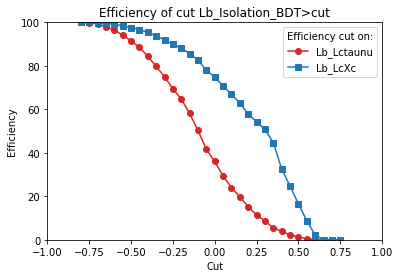

In [12]:
plt.title('Efficiency of cut Lb_Isolation_BDT>cut')
plt.plot(cuts, f_signal, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [13]:
def CheckSelectionFractionsBDT2(nbins,bmin,bmax,cut):
    print(cut)
    h = {sample:{polarity: r.TH1F('h_isoBDT2_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}
    h1 = {sample:{polarity: r.TH1F('h1_isoBDT2_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}

    SelectedEvts = {}
    TOTEvts = {}
    Fraction = {}
    for sample in samples:
        SelectedEvts[sample] = 0
        TOTEvts[sample] = 0
        Fraction[sample] = 0
        branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M','Lb_ISOLATION_BDT2']
        weight = 'Event_PIDCalibEffWeight*w_LbCorr'
        if sample=='Lb_Lctaunu':
            branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M','Event_FFcorr',
                         'Lb_ISOLATION_BDT2']
            weight = 'Event_PIDCalibEffWeight*w_LbCorr*Event_FFcorr'
        for polarity in polarities:
            f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
            t = f.Get('tupleout/DecayTree')
            fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
            tpresel = fpresel.Get('DecayTree')
            t.AddFriend(tpresel)
            t.SetBranchStatus('*',0)
            for br in branchesON:
                t.SetBranchStatus(br,1)
            name = sample+'_'+polarity
            t.Draw('Lb_ISOLATION_BDT2>>Lb_ISOLATION_BDT2_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1&&'+cut+')')
            h[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT2_'+name)
            t.Draw('Lb_ISOLATION_BDT2>>Lb_ISOLATION_BDT2_nocut_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1)')
            h1[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT2_nocut_'+name)
            h[sample][polarity].SetDirectory(0)
            h1[sample][polarity].SetDirectory(0)
            SelectedEvts[sample]+= h[sample][polarity].Integral()
            TOTEvts[sample]+= h1[sample][polarity].Integral()
            Fraction[sample] = SelectedEvts[sample]*100/TOTEvts[sample]
        print('Sample: '+sample+' , selected evts: '+str(SelectedEvts[sample])+' tot. evts: '+str(TOTEvts[sample])+
             '  fraction: '+str(Fraction[sample])+' %')
        
    return Fraction['Lb_Lctaunu'],Fraction['Lb_LcDs']

In [14]:
f_signal_2, f_bkg_2 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_2[i], f_bkg_2[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 477.5465439558029 tot. evts: 8440.81524860859  fraction: 5.657587921196631 %
Sample: Lb_LcDs , selected evts: 13207.097059726715 tot. evts: 28906.336076021194  fraction: 45.689280803326916 %
1 -0.75
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 476.0165620446205 tot. evts: 8440.81524860859  fraction: 5.639461924286148 %
Sample: Lb_LcDs , selected evts: 13201.12444448471 tot. evts: 28906.336076021194  fraction: 45.66861884455671 %
2 -0.7
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 474.84664446115494 tot. evts: 8440.81524860859  fraction: 5.625601680352264 %
Sample: Lb_LcDs , selected evts: 13193.911453008652 tot. evts: 28906.336076021194  fraction: 45.64366586726796 %
3 -0.65
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 468.00592190027237 tot. evts: 8440.81524860859  fraction: 5.544558293

Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %


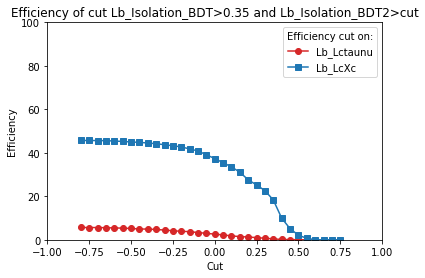

In [15]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.35 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_2, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_2, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [16]:
f_signal_3, f_bkg_3 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_3[i], f_bkg_3[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 758.7944657206535 tot. evts: 8440.81524860859  fraction: 8.989587419837623 %
Sample: Lb_LcDs , selected evts: 15002.864346981049 tot. evts: 28906.336076021194  fraction: 51.901646433241474 %
1 -0.75
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 756.9002636671066 tot. evts: 8440.81524860859  fraction: 8.96714643519625 %
Sample: Lb_LcDs , selected evts: 14995.489060401917 tot. evts: 28906.336076021194  fraction: 51.87613200429505 %
2 -0.7
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 755.730346083641 tot. evts: 8440.81524860859  fraction: 8.953286191262366 %
Sample: Lb_LcDs , selected evts: 14985.691112041473 tot. evts: 28906.336076021194  fraction: 51.842236500089065 %
3 -0.65
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 747.3312839269638 tot. evts: 8440.81524860859  fraction: 8.85378084836244 

Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %


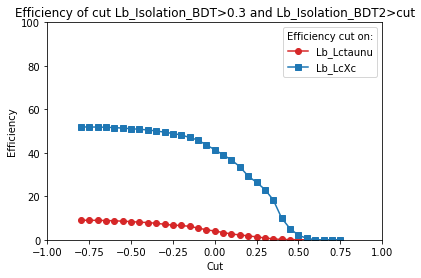

In [17]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.3 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_3, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_3, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [18]:
f_signal_4, f_bkg_4 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_4[i], f_bkg_4[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 1003.109753549099 tot. evts: 8440.81524860859  fraction: 11.884038733278219 %
Sample: Lb_LcDs , selected evts: 16042.760301589966 tot. evts: 28906.336076021194  fraction: 55.499113617854846 %
1 -0.75
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 1001.2155517339706 tot. evts: 8440.81524860859  fraction: 11.861597751461439 %
Sample: Lb_LcDs , selected evts: 16035.38501548767 tot. evts: 28906.336076021194  fraction: 55.473599190558005 %
2 -0.7
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 999.0751045942307 tot. evts: 8440.81524860859  fraction: 11.836239452805478 %
Sample: Lb_LcDs , selected evts: 16023.682591438293 tot. evts: 28906.336076021194  fraction: 55.43311524953345 %
3 -0.65
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 988.2275210618973 tot. evts: 8440.81524860859  fraction: 11.70772

Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %


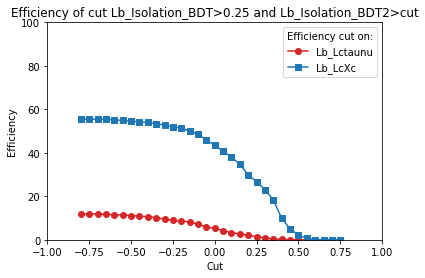

In [19]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.25 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_4, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_4, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [20]:
f_signal_5, f_bkg_5 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_5[i], f_bkg_5[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 1352.0352265238762 tot. evts: 8440.81524860859  fraction: 16.017827504834322 %
Sample: Lb_LcDs , selected evts: 17043.258095741272 tot. evts: 28906.336076021194  fraction: 58.96028486944509 %
1 -0.75
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 1349.8100296258926 tot. evts: 8440.81524860859  fraction: 15.991465159107701 %
Sample: Lb_LcDs , selected evts: 17035.197323799133 tot. evts: 28906.336076021194  fraction: 58.93239903873677 %
2 -0.7
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 1347.2408834695816 tot. evts: 8440.81524860859  fraction: 15.961027978804122 %
Sample: Lb_LcDs , selected evts: 17023.494899749756 tot. evts: 28906.336076021194  fraction: 58.89191509771221 %
3 -0.65
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 1332.3047310113907 tot. evts: 8440.81524860859  fraction: 15.7840764

Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %


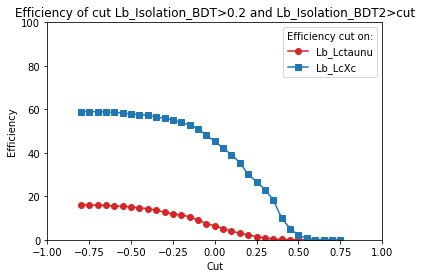

In [21]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.2 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_5, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_5, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [22]:
f_signal_6, f_bkg_6 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_6[i], f_bkg_6[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 332.2489627599716 tot. evts: 8440.81524860859  fraction: 3.9362188719240194 %
Sample: Lb_LcDs , selected evts: 9642.979748725891 tot. evts: 28906.336076021194  fraction: 33.35939817265557 %
1 -0.75
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 330.71898090839386 tot. evts: 8440.81524860859  fraction: 3.918092875719684 %
Sample: Lb_LcDs , selected evts: 9638.361679315567 tot. evts: 28906.336076021194  fraction: 33.34342219632229 %
2 -0.7
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 329.89066392183304 tot. evts: 8440.81524860859  fraction: 3.9082796413085013 %
Sample: Lb_LcDs , selected evts: 9633.65576171875 tot. evts: 28906.336076021194  fraction: 33.32714231365421 %
3 -0.65
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 323.59164023399353 tot. evts: 8440.81524860859  fraction: 3.83365386758507

Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 8440.81524860859  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 28906.336076021194  fraction: 0.0 %


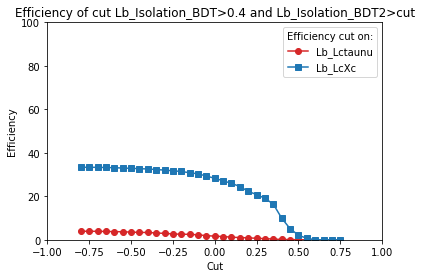

In [23]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.4 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_6, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_6, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()